## **ABOUT WALMART**

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.



## **BUSINESS PROBLEM**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

- **IMPORTING LIBRARIES**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- **LOADING DATASET**

In [4]:
# Load the dataset
df = pd.read_csv('walmart_data.txt')

- **PREVIEW THE DATSET**

In [5]:
# Display first 5 rows of the dataset
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0


- **DATASET**

In [6]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0
...,...,...,...,...,...,...,...,...,...,...
225385,1004715,P00187342,M,26-35,2.0,B,3,0.0,4.0,2753.0
225386,1004715,P00181342,M,26-35,2.0,B,3,0.0,11.0,1695.0
225387,1004715,P00157642,M,26-35,2.0,B,3,0.0,1.0,15346.0
225388,1004715,P00014842,M,26-35,2.0,B,3,0.0,1.0,11773.0


- The dataset contains 550,068 rows, each row represents a unique transaction by a customer.
- 10 columns, which represent different attributes related to the customers and their purchase details

- **INFORMATION OF THE DATASET**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225390 entries, 0 to 225389
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     225390 non-null  int64  
 1   Product_ID                  225389 non-null  object 
 2   Gender                      225389 non-null  object 
 3   Age                         225389 non-null  object 
 4   Occupation                  225389 non-null  float64
 5   City_Category               225389 non-null  object 
 6   Stay_In_Current_City_Years  225389 non-null  object 
 7   Marital_Status              225389 non-null  float64
 8   Product_Category            225389 non-null  float64
 9   Purchase                    225389 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 17.2+ MB


- The datset with 550,068 entries and 10 columns
- Total rows : 550,068, indicating there are 550,068 customer transactions.
- Total columns : 10, representing various customer and transaction attributes.
- All columns have 550,068 non-null entries, meaning there are no missing values in the dataset.

- **SHAPE, SIZE, AND DIMENSIONS**

In [8]:
# Shape of the dataset
print(f"The shape of the dataset      : {df.shape}")

# Size of the dataset
print(f"The size of the dataset       : {df.size}")

#Dimensions the dataset
print(f"The dimensions of the dataset : {df.ndim}")

The shape of the dataset      : (225390, 10)
The size of the dataset       : 2253900
The dimensions of the dataset : 2


- This dataset contains a lot of demographic and transactional data that can be analyzed for customer segmentation, purchasing patterns, and other insights related to consumer behaviour.

- **TO GET ALL ATTRIBUTES**

In [9]:
# To get all features Names
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

- **DATA TYPES OF ALL ATTRIBUTES**

In [10]:
df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,float64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,float64
Product_Category,float64
Purchase,float64


- 5 Columns are of type int64 and remaining 5 columns are of type Object

- **STATISTICAL SUMMARY OF THE DATA**

In [11]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,2.253900e+05,225389.000000,225389.000000,225389.000000,225389.000000
mean,1.002936e+06,8.086863,0.408551,5.292530,9318.194331
std,2.710337e+03,6.527400,0.491567,3.748228,4971.776715
min,1.000000e+02,0.000000,0.000000,1.000000,185.000000
25%,1.001457e+06,2.000000,0.000000,1.000000,5860.000000
50%,1.002969e+06,7.000000,0.000000,5.000000,8059.000000
75%,1.004335e+06,14.000000,1.000000,8.000000,12061.000000
max,1.006040e+06,20.000000,1.000000,18.000000,23961.000000


- To understand the distribution and central tendency(mean, median, standard deviation, etc).
- Key statistics such as count, mean, min, max, and std are calculated for numerical columns like Purchase.

- **HANDLING MISSING VALUES**

In [12]:
# Check for missing values
df.isnull().any()

,0
User_ID,False
Product_ID,True
Gender,True
Age,True
Occupation,True
City_Category,True
Stay_In_Current_City_Years,True
Marital_Status,True
Product_Category,True
Purchase,True


In [13]:
df.isnull().sum()

,0
User_ID,0
Product_ID,1
Gender,1
Age,1
Occupation,1
City_Category,1
Stay_In_Current_City_Years,1
Marital_Status,1
Product_Category,1
Purchase,1


- **TOTAL MISSING VALUES IN THE DATASET**

In [14]:
df.isnull().sum().sum()

9

- **VALUE COUNTS AND UNIQUE ATTRIBUTES**

- To explore the distinct values in categorical variables and understand the frequency distribution.

In [15]:
# Value counts for Gender
df['Gender'].value_counts()

,count
Gender,
M,170197
F,55192


- Male : 414259
- Female : 135809

In [16]:
# Value counts for Age
df['Age'].value_counts()

,count
Age,
26-35,89894
36-45,44905
18-25,41303
46-50,18462
51-55,15905
55+,8850
0-17,6070


- The 26-35 age group has the highest number of customers, followed by 36-45.
- Younger customers(0-17) form a small percentage of the customer base.

In [17]:
# Value counts for Occupation
df['Occupation'].value_counts().head()

,count
Occupation,
4.0,29827
0.0,28709
7.0,24289
1.0,19099
17.0,16439


- Occupations 4, 0, 7 have the highest number of customers

In [18]:
# Value counts for City_Category
df['City_Category'].value_counts()

,count
City_Category,
B,95245
C,69443
A,60701


- Category B has the largest number of customers, followed by category C

In [19]:
# Value counts for Stay_In_Current_City_Years
df['Stay_In_Current_City_Years'].value_counts()

,count
Stay_In_Current_City_Years,
1,79205
2,41765
3,39095
4+,34866
0,30458


- Most customers have stayed in their current city for 1 year.

In [20]:
# value counts for Marital_status
df['Marital_Status'].value_counts()

,count
Marital_Status,
0.0,133306
1.0,92083


- Married customers form a significant portion of the customer base.

In [21]:
# Value counts for Product_Category
df['Product_Category'].value_counts().head()

,count
Product_Category,
5.0,62451
1.0,57973
8.0,47057
11.0,10071
2.0,9872


- Category 1, 5, and 8 have the highest sales.

- **UNIQUE ATTRIBUTES**

In [22]:
# Unique attributes for user_ID
df['User_ID'].nunique()

5890

- The dataset has a total of 5891 unique users

In [23]:
# Descriptive statistics for Purchase
purchase_stats = df['Purchase'].describe()
purchase_stats

,Purchase
count,225389.000000
mean,9318.194331
std,4971.776715
min,185.000000
25%,5860.000000
50%,8059.000000
75%,12061.000000
max,23961.000000


- The average purchase amount is 9263 with a maximun of 23961
- The distribution is slightly right-skewed indicating some high-value purchases.

- **CONVERTING VARIABLES INTO CATEGORIES**

In [24]:
# Convert categorical columns to 'category' type
categorical_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Marital_Status']
for col in categorical_cols:
    df[col] = df[col].astype('category')

#Confirm the change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225390 entries, 0 to 225389
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     225390 non-null  int64   
 1   Product_ID                  225389 non-null  object  
 2   Gender                      225389 non-null  category
 3   Age                         225389 non-null  category
 4   Occupation                  225389 non-null  category
 5   City_Category               225389 non-null  category
 6   Stay_In_Current_City_Years  225389 non-null  object  
 7   Marital_Status              225389 non-null  category
 8   Product_Category            225389 non-null  float64 
 9   Purchase                    225389 non-null  float64 
dtypes: category(5), float64(2), int64(1), object(2)
memory usage: 9.7+ MB


- Memory usage decreases after converting categorical variables to the category data type

## **UNIVARIATE ANALYSIS**

- To analyze the distribution o individual variables, identify patterns, and detect outliers in the dataset

- **ANALYZING THE PURCHASE COLUMN(NUMERICAL VARIABLES)**

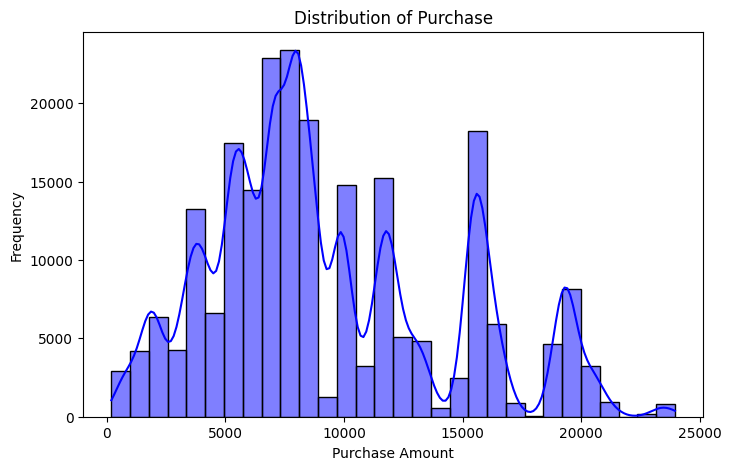

In [25]:
# Distributio plot for purchase
plt.figure(figsize = (8,5))
sns.histplot(df['Purchase'], kde = True, color = 'blue', bins = 30)
plt.title('Distribution of Purchase')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

- Displays the frequency distribution of the purchase amounts.
- The data appears to have a multimodal distribution with several peaks.
- The mojority of purchases amounts are concentrated between 5000 and 15000.
- The most frequent purchase amounts lie between 5000 and 10000 peaking around 7000-8000
purchase amounts above 20000 are less frequent

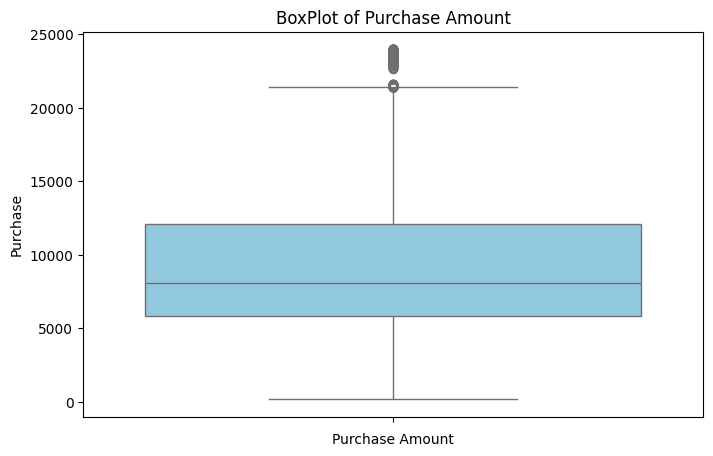

In [26]:
# Boxplot for purchase
plt.figure(figsize = (8,5))
sns.boxplot(df['Purchase'], color = 'skyblue')
plt.title('BoxPlot of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.show()

- The box represents the Interquartile Range(IQR), which is the range between the first quartile(25th Percentile) and the third quartile (75th Percentile). Most purchase amounts fall within this range.
- The 'Whiskers"(Lines extending from the box) show the spread of the data, covering a range of values excluding outliers.
- Points above the upper whisker are outliers. They might indiacte occasional high-value purchases or errors in data entry.

- **ANALYZING THE GENDER COLUMN(CATEGORICAL VARIABLE)**

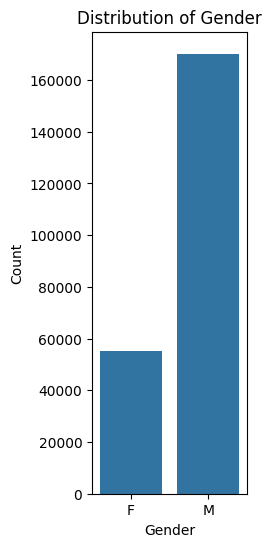

In [27]:
# Countplot for Gender
plt.figure(figsize = (2,6))
sns.countplot(x = df['Gender'])
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

- The majority of entries in the dataset are male (M), Female(F) entries are significantly fewer than male entries
- The male count is around 400000, Female count is around 150000.

- **ANALYZING THE AGE COLUMN(CATEGORICAL VARIABLE**

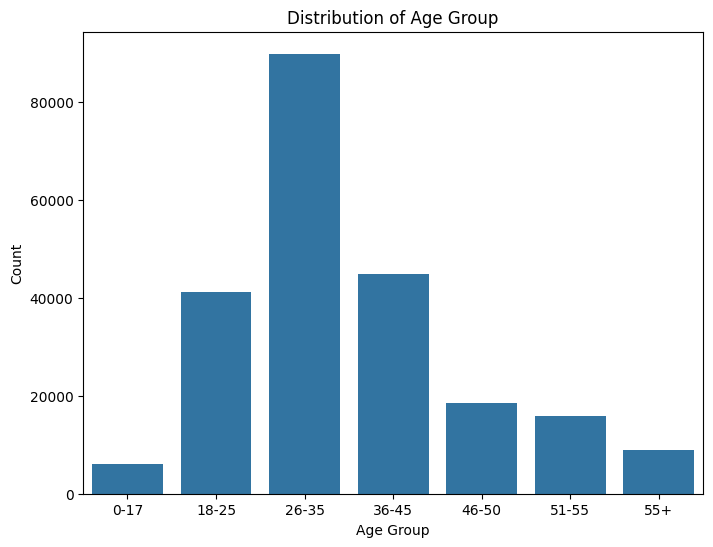

In [28]:
# Countplot for Age
plt.figure(figsize = (8,6))
sns.countplot(x = df['Age'])
plt.title('Distribution of Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

- The age group 26-35 is the most dominant, with the highest count exceeding 200000. This indicates that a significant portion of the population or dtaset is concentrated in this age group.
- The 18-25 age group follows, with a substantial count, suggesting a younger demographic presence.
- After the 26-35 age group , the count decreases progressively across the older age groups

- **ANALYZING THE CITY_CATEGORY COLUMN(CATEGORICAL VARIABLE)**

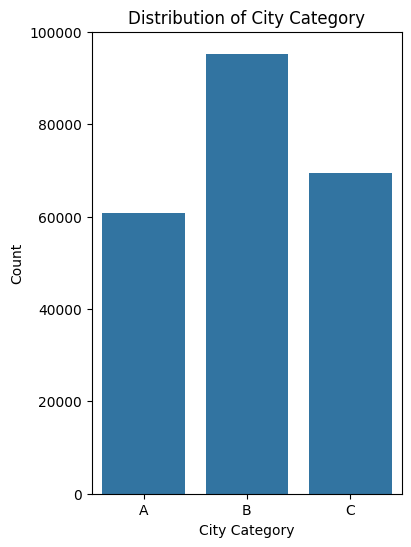

In [29]:
# Count plot for city category
plt.figure(figsize = (4,6))
sns.countplot(x = df['City_Category'])
plt.title('Distribution of City Category')
plt.xlabel('City Category')
plt.ylabel('Count')
plt.show()

- Among the 3 categories(A,B,C), city category B has the highest number of entries, indicating that it represents the largest group in the dataset.
- City category C has a slightly lower count than city B but is larger compared to City A

- **ANALYZING THE MARITAL_STATUS COLUMNS(CATEGORICAL VARIABLE)**

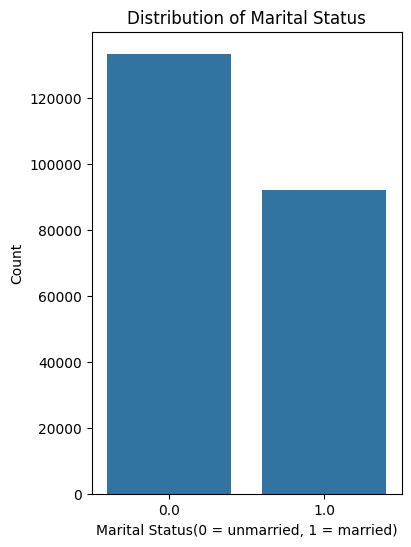

In [30]:
# Count plot for Marital_Status
plt.figure(figsize = (4,6))
sns.countplot(x = df['Marital_Status'])
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status(0 = unmarried, 1 = married)')
plt.ylabel('Count')
plt.show()

- The number of unmarried individuals is higher than married individuals

## **BIVARIATE ANALYSIS**

- To explore relationships between two variables, understand patterns, and identify potential correlations or dependencies.

- **GENDER VS. PURCHASE**

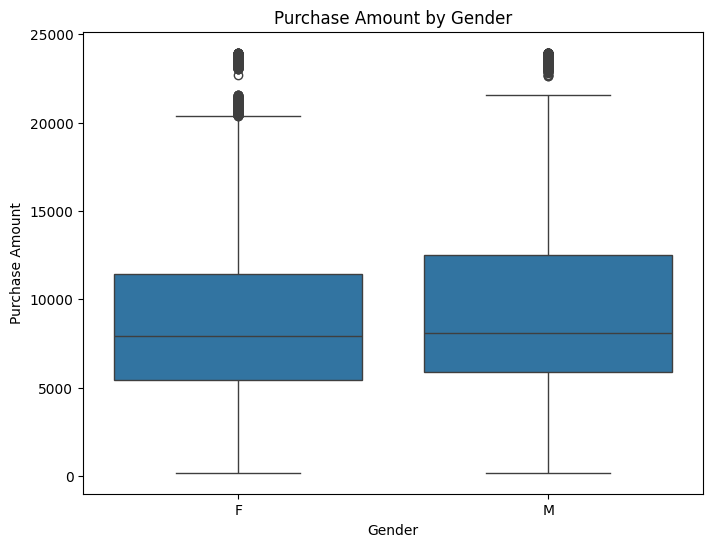

In [31]:
# Boxplot for Gender vs. Purchase
plt.figure(figsize = (8,6))
sns.boxplot(x = df['Gender'], y = df['Purchase'])
plt.title('Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.show()

- **AGE VS. PURCHASE**

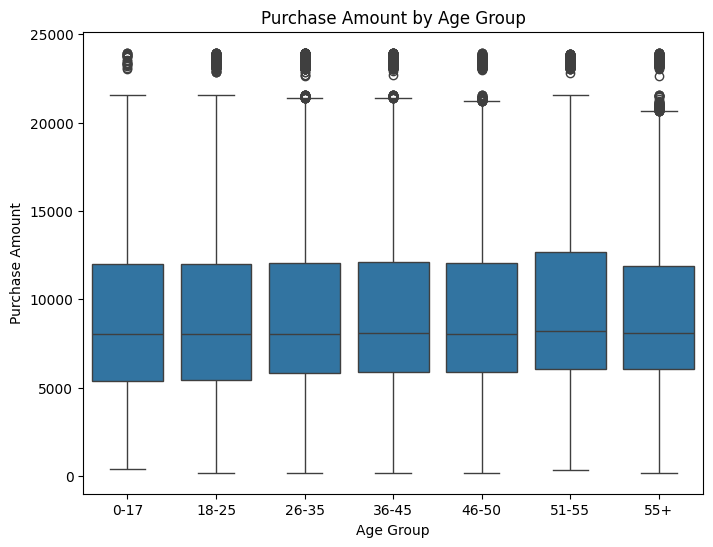

In [32]:
# Boxplot for Age Vs. Purchase
plt.figure(figsize = (8,6))
sns.boxplot(x = df['Age'], y = df['Purchase'])
plt.title('Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.show()

- The plot shows average spending by different age groups
- Most profitable group is (51-55)

- **CITY_CATEGORY VS. PURCHASE**

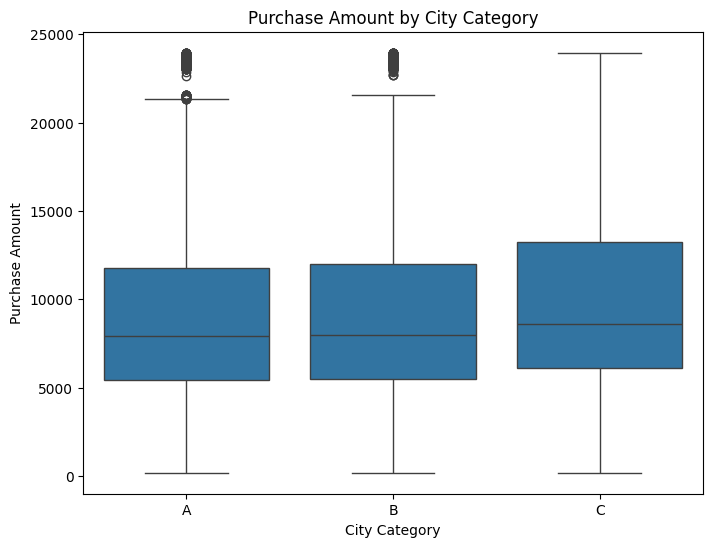

In [48]:
# Boxplot for city_category vs. Purchase
plt.figure(figsize = (8,6))
sns.boxplot(x = df['City_Category'], y = df['Purchase'])
plt.title('Purchase Amount by City Category')
plt.xlabel('City Category')
plt.ylabel('Purchase Amount')
plt.show()

- The provided boxplot compares the purchase amounts across three city categories (A,B, and C).
- The median purchase amount appears similar across all three city categories.
- B shows a slightly wider IQR, Indicating higher variability in spending.
- A has a narrower IQR compared to B and C, indicating more consistent spending behaviour
- City B has a higher range in spending.

- **MARITAL_STATUS VS. PURCHASE**

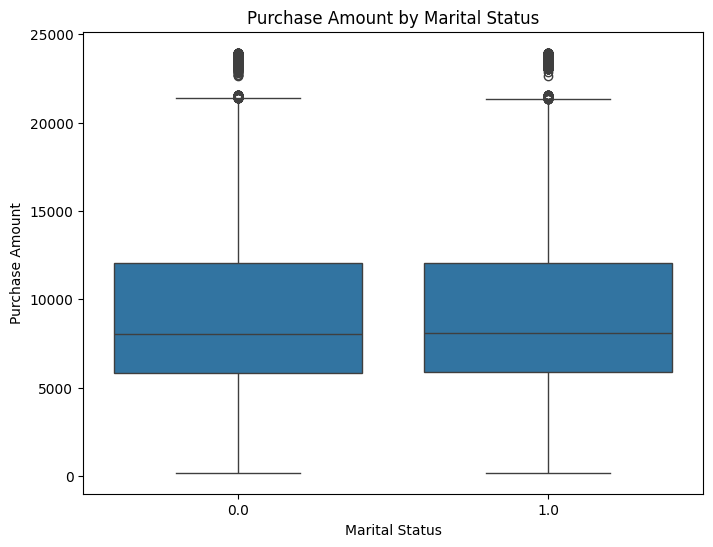

In [50]:
# Boxplot for Marital_status vs. Purchase
plt.figure(figsize = (8,6))
sns.boxplot(x = df['Marital_Status'], y = df['Purchase'])
plt.title('Purchase Amount by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Purchase Amount')
plt.show()

- It displays the median, interquartile range, and potential outliers for each marital status group.
- Married individuals seem to have a slightly higher median purchase amount compared to unmarried individuals.
- Both groups have similar range of purchase amounts, with some outliers in higher spending levels.

- **OCCUPATION VS. PURCHASE**

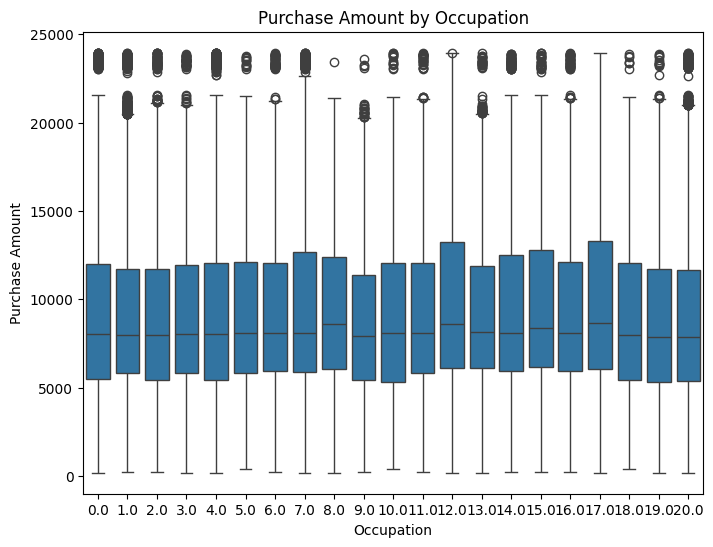

In [53]:
# Boxplot for Occupation vs. Purchase
plt.figure(figsize = (8,6))
sns.boxplot(x = df['Occupation'], y = df['Purchase'])
plt.title('Purchase Amount by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Purchase Amount')
plt.show()

- Most occupatuions exhibit a similar median purchase amount, indicating no significant disparity among different occupations.
- Occuaptions 4,7 and 17 seem to have a slightly higher purchase range compared to others.
- There are many outliers across all occupations, representing customers who spend significantly more than the majority
- The spread of IQR is relatively consistent across occupations.

- **STAY IN CURRENT CITY YEARS VS. PURCHASE**

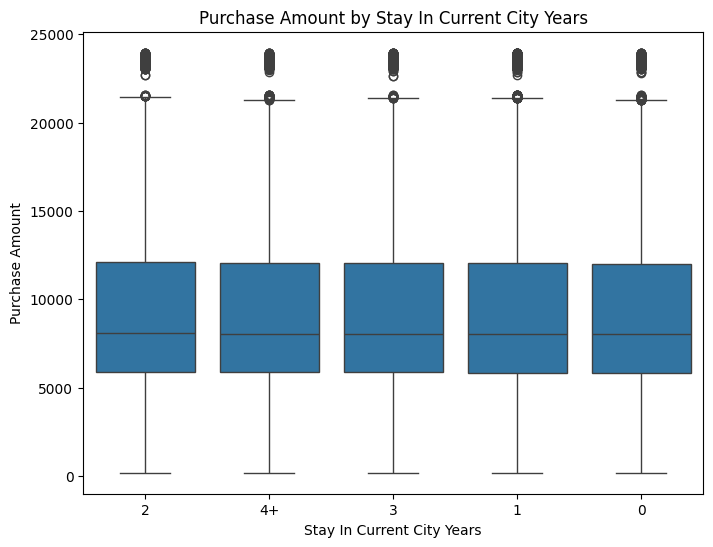

In [55]:
# Boxplot for Stay_In_Current_City_Years vs. Purchase
plt.figure(figsize = (8,6))
sns.boxplot(x = df['Stay_In_Current_City_Years'], y = df['Purchase'])
plt.title('Purchase Amount by Stay In Current City Years')
plt.xlabel('Stay In Current City Years')
plt.ylabel('Purchase Amount')
plt.show()

- First, the median purchase amount is consistent across all categories, indicating that the length of stay in the current city does not significantly impact the central tendency of purchase behavior.
- Second, the interquartile range (IQR) is similar across all groups, suggesting a comparable spread in the middle 50% of purchase amounts.
- Third, outliers are present in all categories, highlighting that some individuals make unusually high purchases regardless of their city stay duration.
- Fourth, customers with "4+ years" and "1 year" in the current city show slightly higher variability, as seen from longer whiskers, though the overall differences remain minor.
- Lastly, the distribution's general consistency suggests that other factors beyond city stay duration may play a more influential role in determining purchase behavior.

## **CONFIDENCE INTERVAL AND CENTRAL LIMIT THEOREM(CLT)**

- To determine the interval within which the true population mean lies with a certain confidence level.

- To demonstrate the Central Limit Theorem(CLT), Which states that the sampling distribution of the sample mean approaches a normal distribution as the sample size increases, regardless of the population's distribution.

### **CALCULATE CONFIDENCE INTERVAL FOR MALE AND FEMALE PURCHASES**

In [37]:
import numpy as np
from scipy.stats import norm

# Seaparate data for males and females
male_purchase = df[df['Gender'] == 'M']['Purchase']
female_purchase = df[df['Gender'] == 'F']['Purchase']

# Function to calculate confidence interval
def calculate_confidence_interval(df, confidence_level = 0.95):
    sample_mean = np.mean(df)
    sample_std = np.std(df, ddof = 1)
    sample_size = len(df)
    z_value = norm.ppf((1+confidence_level)/2)
    # Z_value for the confidence_level
    margin_of_error = z_value * (sample_std / np.sqrt(sample_size))
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    return lower_bound, upper_bound

# Calculate confidence Interval
male_ci = calculate_confidence_interval(male_purchase)
female_ci = calculate_confidence_interval(female_purchase)

# Print the confidence intervals
print(f"Confidence Interval for Male Purchases: {male_ci}")
print(f"Confidence Interval for Female Purchases: {female_ci}")

Confidence Interval for Male Purchases: (9458.606462056547, 9506.538857778703)
Confidence Interval for Female Purchases: (8772.050788127064, 8850.542450023393)


- The confidence interval provides a range in ehich true population mean for male and Female spending is likely to lie
- Compare the intervals to see if there's an overlap

- **DEOMONSTRATE CENTRAL LIMIT THEOREM**

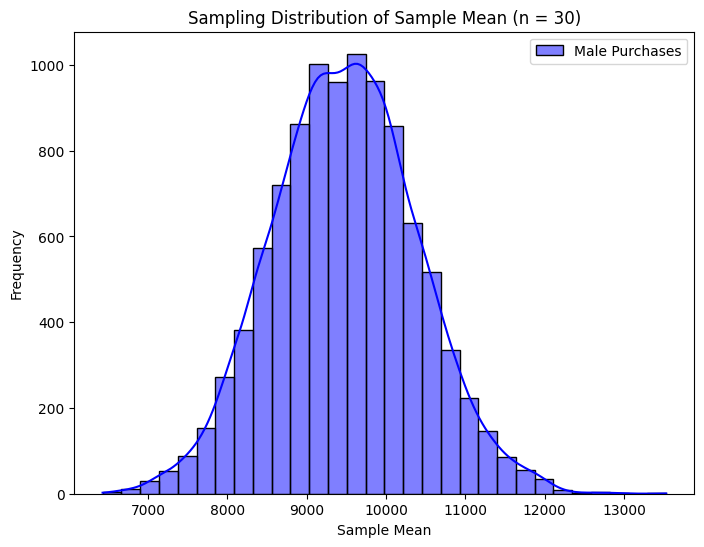

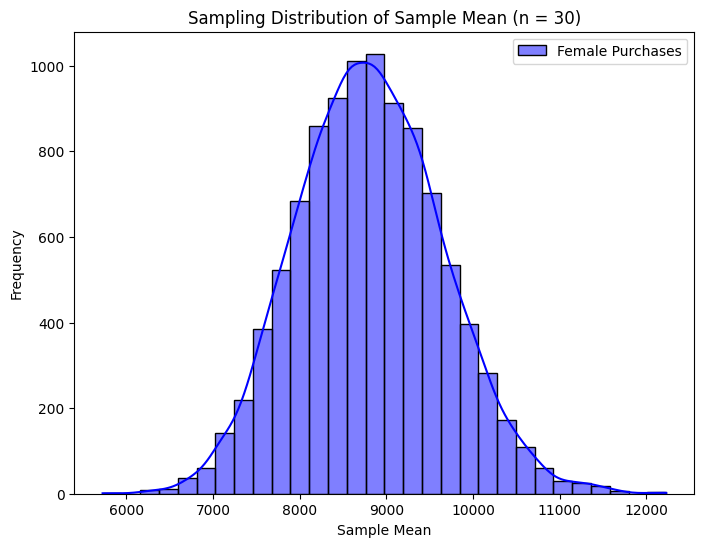

In [38]:
# Sampling distribution function
def plot_sampling_distribution(df, sample_size, num_samples, label):
    sample_means = [] # Initialize sample_means here, before the loop
    for _ in range(num_samples):
        sample = np.random.choice(df, size = sample_size, replace = True)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean) # Append inside the loop

    plt.figure(figsize = (8,6))
    sns.histplot(sample_means, bins = 30, kde = True, color = 'blue', label = label)
    plt.title(f'Sampling Distribution of Sample Mean (n = {sample_size})')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Plot sampling distribution for males
plot_sampling_distribution(male_purchase, sample_size = 30, num_samples = 10000, label = 'Male Purchases')
plot_sampling_distribution(female_purchase, sample_size = 30, num_samples = 10000, label = 'Female Purchases')

- As the sample size increases, the distribution of sample means becomes approximately normal
- This supports the use of confidence intervals to estimate the true mean

- **CONFIDENCE INTERVAL OVERLAP ANALYSIS**

In [39]:
# Check for overlap
def check_overlap(ci1, ci2):
  return not (ci2[0] > ci1[1] or ci2[1] < ci1[0])

# Check overlap between male and female confidence intervals
overlap = check_overlap(male_ci, female_ci)
if overlap:
    print("Confidence intervals for male and female purchases overlap.")
else:
    print("Confidence intervals for male and female purchases do not overlap.")

Confidence intervals for male and female purchases do not overlap.


- If the confidence intervals do not overlap, there is a significant difference between male and female spending habits

### **CONFIDENCE INTERVAL AND CLT FOR MARRIED VS. UNMARRIED**

- To analyze the differences in spending between married and unmarried customers and determine if their spending habits differ significantly

In [40]:
# Separate data for married and unmarried customers
married_puchases = df[df['Marital_Status']==1]['Purchase']
unmarried_purchases = df[df['Marital_Status']==0]['Purchase']

In [41]:
# Function to calculate confidence interval
def calculate_confidence_interval(df, confidence_level = 0.95):
    sample_mean = np.mean(df)
    sample_std = np.std(df, ddof = 1)
    sample_size = len(df)
    z_value = norm.ppf((1+confidence_level)/2)
    # Z_value for the confidence_level
    margin_of_error = z_value * (sample_std / np.sqrt(sample_size))
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    return lower_bound, upper_bound

In [42]:
# Calculate confidence intervals
married_ci = calculate_confidence_interval(married_puchases)
unmarried_ci = calculate_confidence_interval(unmarried_purchases)

print(f"Confidence Interval for Married Customers: {married_ci}")
print(f"Confidence Interval for Unmarried Customers: {unmarried_ci}")

Confidence Interval for Married Customers: (9306.733737291464, 9370.97461278401)
Confidence Interval for Unmarried Customers: (9277.238997588825, 9330.607505944397)


- Confidence intervals for married and unmarried customers help understand their spending range

- **DEMONSTRATE CLT FOR MARRIED AND UNMARRIED PURCHASES**

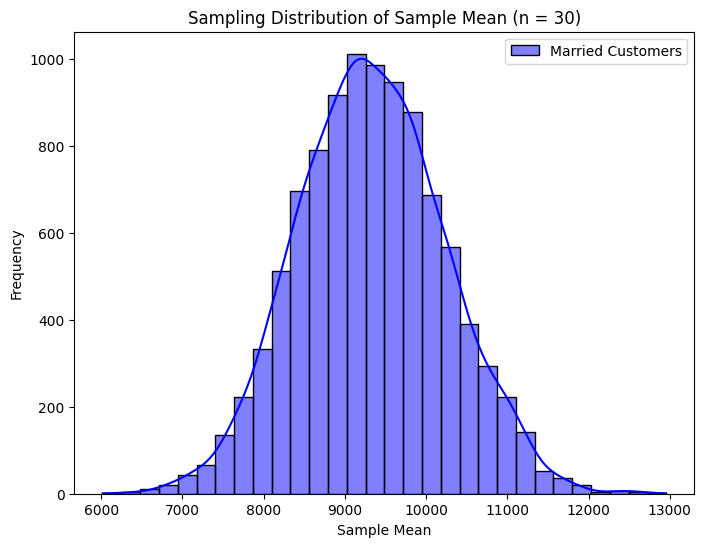

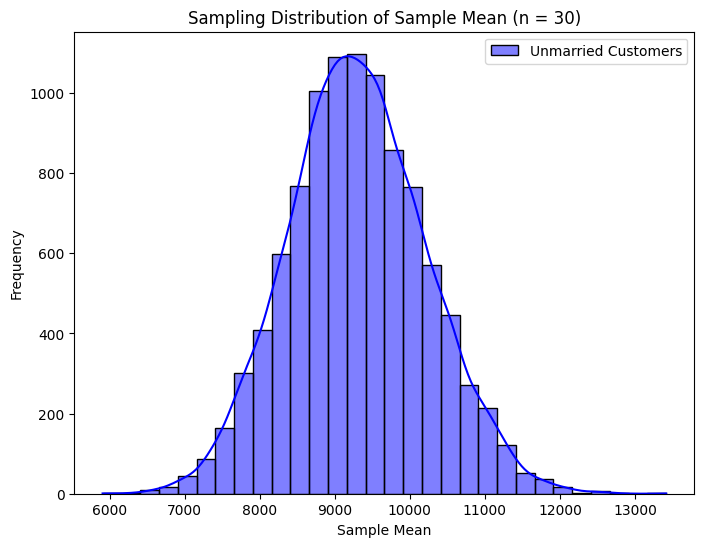

In [43]:
# Plot sampling distribution for married customers
plot_sampling_distribution(married_puchases, sample_size = 30, num_samples = 10000, label = 'Married Customers')

# Plot sampling distribution for unmarried customers
plot_sampling_distribution(unmarried_purchases, sample_size = 30, num_samples = 10000, label = 'Unmarried Customers')

- **CONFIDENCE INTERVAL OVERLAP ANALYSIS**

In [44]:
# Check for overlap
marital_overlap = check_overlap(married_ci, unmarried_ci)
if marital_overlap:
    print("Confidence intervals for married and unmarried customers overlap.")
else:
    print("Confidence intervals for married and unmarried customers do not overlap.")

Confidence intervals for married and unmarried customers overlap.


- No significant difference in spending between and unmarried customers

### **CONFIDENCE INTERVALS FOR AGE GROUPS**

In [45]:
# Create bins for age groups
age_groups = df.groupby('Age')['Purchase']

# Calculate confidence intervals for each group
age_group_cis = {}
for age_group, group_data in age_groups:
    ci = calculate_confidence_interval(group_data)
    age_group_cis[age_group] = ci

print("Confidence Intervals for Age Groups:")
for age_group, ci in age_group_cis.items():
    print(f"{age_group}: {ci}")

Confidence Intervals for Age Groups:
0-17: (8944.771969981382, 9201.170039903296)
18-25: (9145.890890610559, 9241.85765065763)
26-35: (9266.630397912062, 9331.477595947372)
36-45: (9343.660561779554, 9435.773977804012)
46-50: (9217.059051701242, 9359.046678988823)
51-55: (9551.83981900906, 9708.316484040297)
55+: (9298.214672092094, 9502.720921128246)


<ipython-input-45-8438d694a88c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_groups = df.groupby('Age')['Purchase']


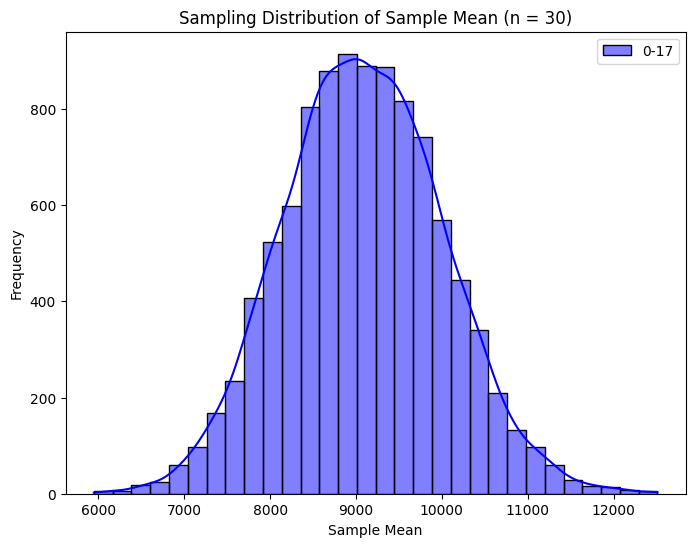

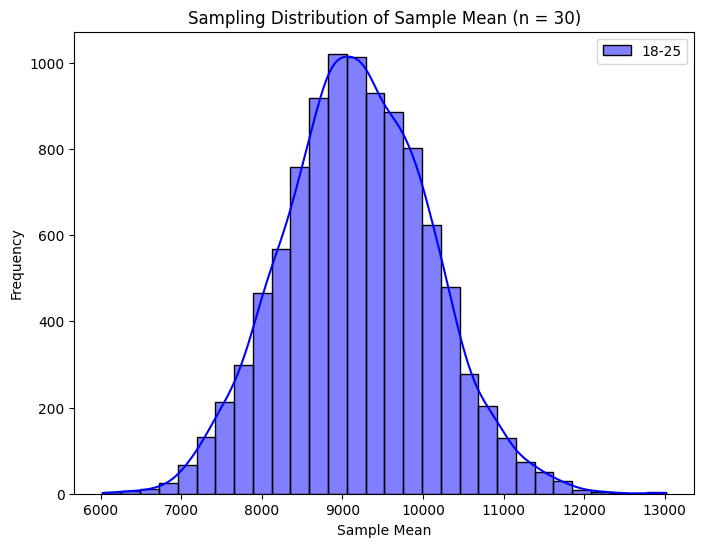

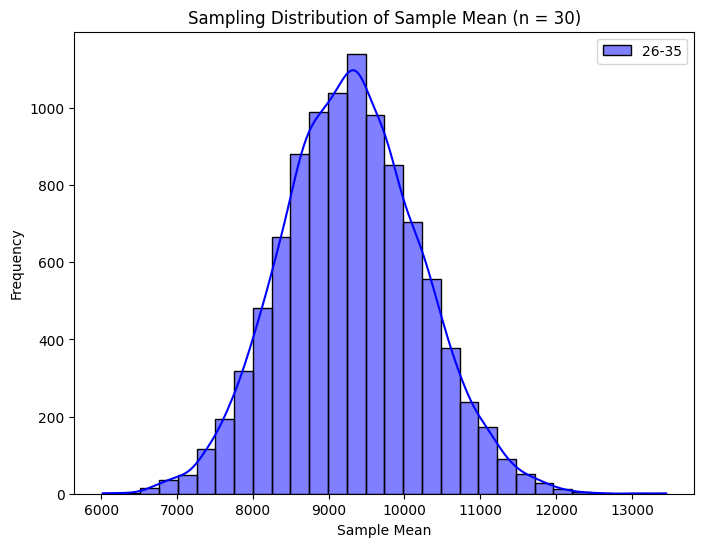

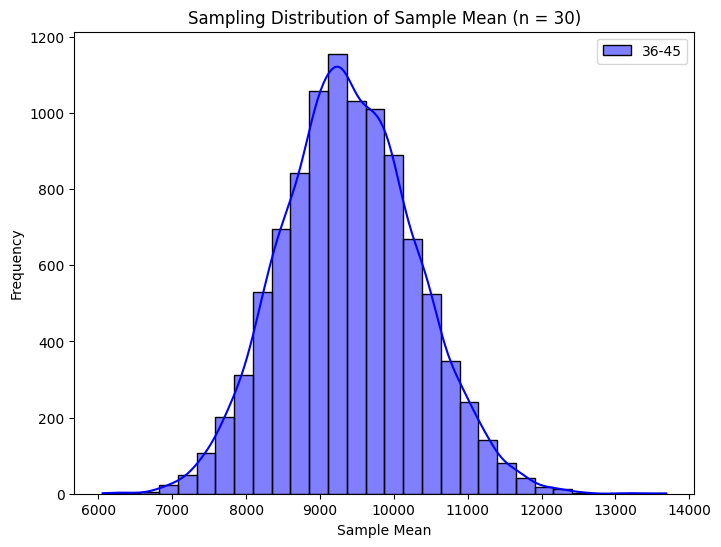

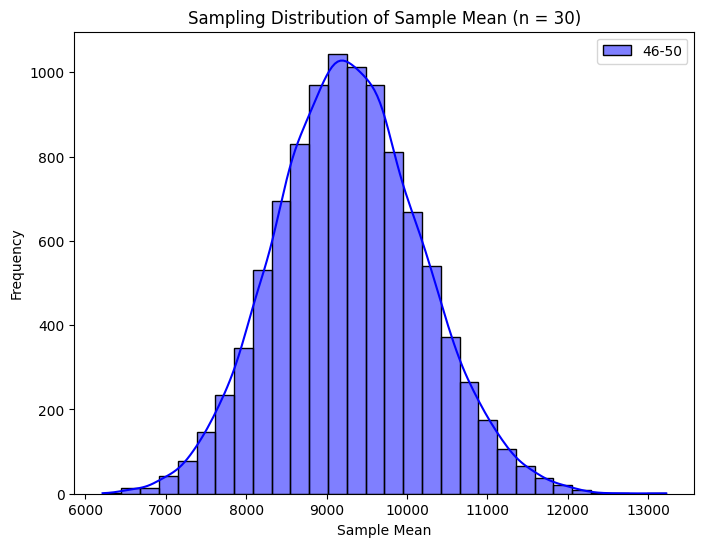

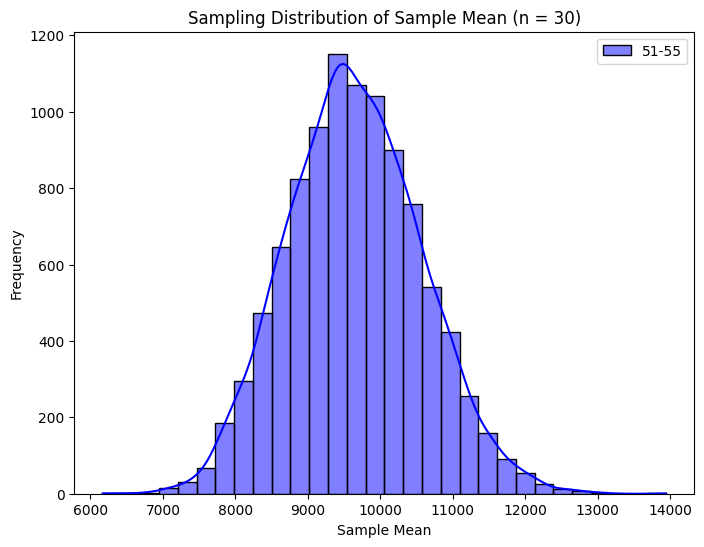

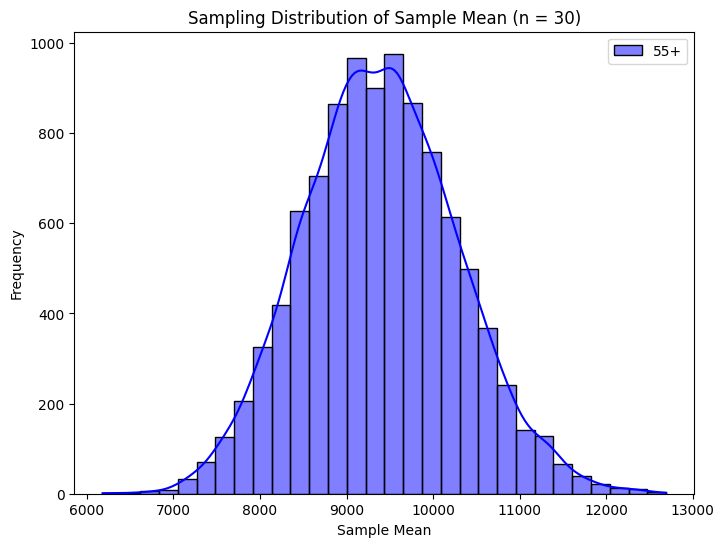

In [46]:
# Plot sampling distributions for each group
for age_group, group_data in age_groups:
    plot_sampling_distribution(group_data, sample_size = 30, num_samples = 10000, label = age_group)

- **INSIGHTS**

- Spending by Gender: Women tend to spend slightly more per transaction than men during Black Friday, as seen from the average spending amounts. However, the difference is not very large.
- Spending by Marital Status: Married customers generally spend more than unmarried ones. This could be because married individuals often buy for their families, leading to higher purchase amounts.
- Spending by Age: The age group 26–35 spends the most, followed by 36–50. Younger individuals (18–25) and older customers (51+) spend comparatively less.
- City Categories: Customers from Category A cities (larger metropolitan areas) tend to spend more than those from smaller cities (Categories B and C).
- Consistency in Patterns: The confidence intervals for spending averages show that the spending patterns are consistent across groups, with some overlaps indicating similarity.

- **RECOMMENDATIONS**

- Target Female Shoppers:Create special Black Friday deals and promotions targeted toward women, as they tend to spend slightly more.
Offer discounts on products popular with female customers, such as home essentials or fashion.
- Family-Oriented Promotions:Design promotions for families to attract married customers, such as bundle deals or discounts on bulk purchases.
- Focus on Key Age Groups:Concentrate marketing efforts on the 26–35 and 36–50 age groups since they spend the most.
Create personalized offers or advertise products that appeal to these life stages (e.g., home appliances, electronics).
- City-Specific Strategies:Invest in more aggressive marketing and inventory in Category A cities to capture high-spending customers.
Offer incentives or discounts to encourage higher spending in smaller cities.
- Broader Engagement:Use insights to tailor marketing campaigns for specific groups, ensuring better customer engagement and higher sales.
Consider loyalty programs that reward frequent shoppers, encouraging repeat purchases across all customer segments.